![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [37]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import CSV for prices
airbnb_price = pd.read_csv('data/airbnb_price.csv')

# Import Excel file for room types
airbnb_room_type = pd.read_excel('data/airbnb_room_type.xlsx')

# Import TSV for review dates
airbnb_last_review = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')

# Join the three data frames together into one
listings = pd.merge(airbnb_price, airbnb_room_type, on='listing_id')
listings = pd.merge(listings, airbnb_last_review, on='listing_id')

# What are the dates of the earliest and most recent reviews?
# To use a function like max()/min() on last_review date column, it needs to be converted to datetime type
listings['last_review_date'] = pd.to_datetime(listings['last_review'], format='%B %d %Y')
first_reviewed = listings['last_review_date'].min()
last_reviewed = listings['last_review_date'].max()

# How many of the listings are private rooms?
# Since there are differences in capitalization, make capitalization consistent
listings['room_type'] = listings['room_type'].str.lower()
private_room_count = listings[listings['room_type'] == 'private room'].shape[0]

# What is the average listing price?
# To convert price to numeric, remove " dollars" from each value
listings['price_clean'] = listings['price'].str.replace(' dollars', '').astype(float)
avg_price = listings['price_clean'].mean()

review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [private_room_count],
    'avg_price': [round(avg_price, 2)]
})

print(review_dates)


  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78


In [38]:
print(listings.info())
print(listings.describe())
display(listings.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   listing_id        25209 non-null  int64         
 1   price             25209 non-null  object        
 2   nbhood_full       25209 non-null  object        
 3   description       25199 non-null  object        
 4   room_type         25209 non-null  object        
 5   host_name         25201 non-null  object        
 6   last_review       25209 non-null  object        
 7   last_review_date  25209 non-null  datetime64[ns]
 8   price_clean       25209 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.9+ MB
None
         listing_id   price_clean
count  2.520900e+04  25209.000000
mean   2.068922e+07    141.777936
std    1.102928e+07    147.349137
min    2.595000e+03      0.000000
25%    1.202273e+07     69.000000
50%    2

,listing_id,price,nbhood_full,description,room_type,host_name,last_review,last_review_date,price_clean
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,entire home/apt,Jennifer,May 21 2019,2019-05-21,225.0
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,July 05 2019,2019-07-05,89.0
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,June 22 2019,2019-06-22,200.0
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019,2019-06-24,79.0
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,June 09 2019,2019-06-09,150.0


In [39]:
print(listings.nbhood_full.value_counts())
print(listings.room_type.value_counts())
listings.room_type = listings.room_type.astype("category")
#adding nbhood column
listings["neighborhood"] = listings.nbhood_full.str.split(",").str[0].astype("category")

#removeing outliers 
price_25 = listings.price_clean.quantile(.25)
price_75 = listings.price_clean.quantile(.75)
IQR = price_75 - price_25
lower = price_25 - (1.5*IQR)
upper = price_75 + (1.5*IQR)

clean_listing_df = listings[(listings["price_clean"]>=lower)&(listings["price_clean"]<=upper)]
outlier_listing_df = listings[(listings["price_clean"]<lower)|(listings["price_clean"]>upper)]


print(clean_listing_df.info())
print(clean_listing_df.describe())

Brooklyn, Bedford-Stuyvesant      2209
Brooklyn, Williamsburg            1853
Manhattan, Harlem                 1435
Brooklyn, Bushwick                1202
Manhattan, Hell's Kitchen         1119
                                  ... 
Staten Island, Lighthouse Hill       1
Bronx, Co-op City                    1
Queens, Little Neck                  1
Staten Island, Howland Hook          1
Staten Island, Prince's Bay          1
Name: nbhood_full, Length: 217, dtype: int64
entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23883 entries, 0 to 25208
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   listing_id        23883 non-null  int64         
 1   price             23883 non-null  object        
 2   nbhood_full       23883 non-null  object        
 3   description       23873 non-null  obj

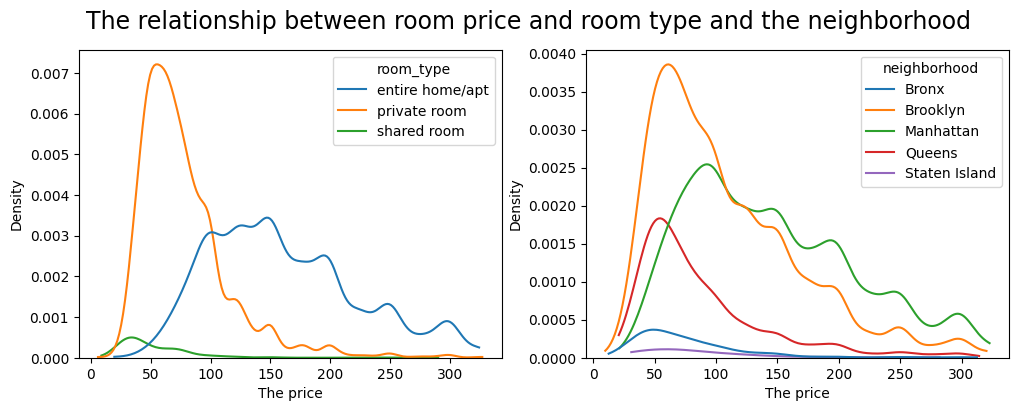

In [48]:
new_clean_listring = clean_listing_df.loc[:,["room_type", "last_review_date", "price_clean", "neighborhood"]]
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
fig.suptitle("The relationship between room price and room type and the neighborhood", fontsize=17)
price_roomtype = sns.kdeplot(data=new_clean_listring, x="price_clean", hue="room_type", ax=ax[0], cut=-1)
price_roomtype.set(xlabel="The price")
price_nbhood = sns.kdeplot(data=new_clean_listring, x="price_clean", hue="neighborhood", ax=ax[1],cut=-1)
price_nbhood.set(xlabel="The price")
plt.show()

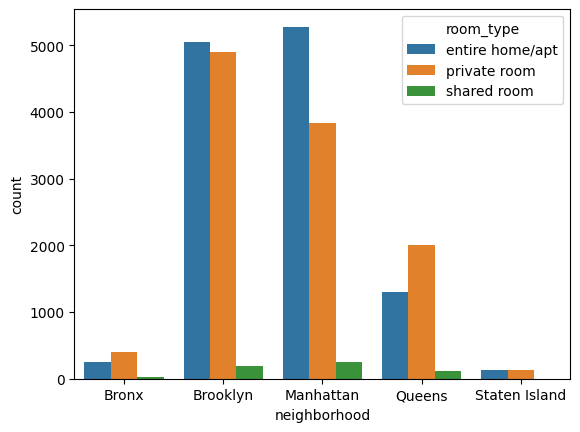

In [45]:
sns.countplot(data=new_clean_listring, x="neighborhood", hue="room_type")
plt.show()